In [1]:
import ROOT

Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMvn2d_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sys
import time

In [5]:
input_filebase = 'bootstrap-output-test1c'

In [6]:
with open('%s.npy' % input_filebase,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    bootstrap_weights = np.load(f)

In [7]:
nboot = len(bootstrap_weights)
nmcevts = len(train_pts)

print( "train_pts shape:  %s" % str(train_pts.shape))
print( "bootstrap_weights:  %s" % str(bootstrap_weights.shape))
print( "number of bootstraps: %d" % nboot)
print( "number of MC events: %d" % nmcevts)

train_pts shape:  (100000, 2)
bootstrap_weights:  (250, 100000)
number of bootstraps: 250
number of MC events: 100000


In [8]:
true_mean_x = 0.2
true_mean_y = 0.8
true_sigma_x = 0.9
true_sigma_y = 1.3
true_rho_xy = -0.6
true_sigma2_x = true_sigma_x * true_sigma_x
true_sigma2_y = true_sigma_y * true_sigma_y
true_cov_xy = true_rho_xy * true_sigma_x * true_sigma_y

In [9]:
x = ROOT.RooRealVar("x","x",-10.,10.)
y = ROOT.RooRealVar("y","y",-10.,10.)
mean_x = ROOT.RooRealVar("mean_x","mean_x", true_mean_x, -3., 3.)
mean_y = ROOT.RooRealVar("mean_y","mean_y", true_mean_y, -3., 3.)
sigma2_x = ROOT.RooRealVar("sigma2_x","sigma2_x", true_sigma2_x, 0.1, 9. )
sigma2_y = ROOT.RooRealVar("sigma2_y","sigma2_y", true_sigma2_y, 0.1, 9. )
cov_xy = ROOT.RooRealVar("cov_xy","cov_xy", true_cov_xy, -9., 9.)

weight = ROOT.RooRealVar("weight","weight", 0., 100. )

In [10]:
rmvn = ROOT.RooMvn2d( "rmvn", "rmvn", x, y, mean_x, mean_y, sigma2_x, sigma2_y, cov_xy )

In [11]:
fit_mean_x = np.zeros( len(bootstrap_weights) )
fit_mean_y = np.zeros( len(bootstrap_weights) )
fit_sigma2_x = np.zeros( len(bootstrap_weights) )
fit_sigma2_y = np.zeros( len(bootstrap_weights) )
fit_cov_xy = np.zeros( len(bootstrap_weights) )

In [12]:
%%time

for bi in range( len(bootstrap_weights)) :
    
    print("\n\n --- Fitting bootstrap sample %3d" % bi, flush=True )
    sys.stdout.flush()
    
    data_weighted = ROOT.RooDataSet("data_weighted","data_weighted", ROOT.RooArgSet(x,y,weight), ROOT.RooFit.WeightVar("weight"))
    
    for i in range( len(train_pts) ) :
        x.setVal(train_pts[i,0])
        y.setVal(train_pts[i,1])
        weight.setVal(bootstrap_weights[bi,i])
        data_weighted.add( ROOT.RooArgSet(x,y,weight), weight.getVal())
        
    rfr = rmvn.fitTo( data_weighted, ROOT.RooFit.SumW2Error(True), ROOT.RooFit.Save(True))
    
    fit_mean_x[bi] = mean_x.getVal()
    fit_mean_y[bi] = mean_y.getVal()
    fit_sigma2_x[bi] = sigma2_x.getVal()
    fit_sigma2_y[bi] = sigma2_y.getVal()
    fit_cov_xy[bi] = cov_xy.getVal()
    
    



 --- Fitting bootstrap sample   0


 --- Fitting bootstrap sample   1


 --- Fitting bootstrap sample   2


 --- Fitting bootstrap sample   3


 --- Fitting bootstrap sample   4


 --- Fitting bootstrap sample   5


 --- Fitting bootstrap sample   6


 --- Fitting bootstrap sample   7


 --- Fitting bootstrap sample   8


 --- Fitting bootstrap sample   9


 --- Fitting bootstrap sample  10


 --- Fitting bootstrap sample  11


 --- Fitting bootstrap sample  12


 --- Fitting bootstrap sample  13


 --- Fitting bootstrap sample  14


 --- Fitting bootstrap sample  15


 --- Fitting bootstrap sample  16


 --- Fitting bootstrap sample  17


 --- Fitting bootstrap sample  18


 --- Fitting bootstrap sample  19


 --- Fitting bootstrap sample  20


 --- Fitting bootstrap sample  21


 --- Fitting bootstrap sample  22


 --- Fitting bootstrap sample  23


 --- Fitting bootstrap sample  24


 --- Fitting bootstrap sample  25


 --- Fitting bootstrap sample  26


 --- Fitting bootstrap sam



 --- Fitting bootstrap sample 228


 --- Fitting bootstrap sample 229


 --- Fitting bootstrap sample 230


 --- Fitting bootstrap sample 231


 --- Fitting bootstrap sample 232


 --- Fitting bootstrap sample 233


 --- Fitting bootstrap sample 234


 --- Fitting bootstrap sample 235


 --- Fitting bootstrap sample 236


 --- Fitting bootstrap sample 237


 --- Fitting bootstrap sample 238


 --- Fitting bootstrap sample 239


 --- Fitting bootstrap sample 240


 --- Fitting bootstrap sample 241


 --- Fitting bootstrap sample 242


 --- Fitting bootstrap sample 243


 --- Fitting bootstrap sample 244


 --- Fitting bootstrap sample 245


 --- Fitting bootstrap sample 246


 --- Fitting bootstrap sample 247


 --- Fitting bootstrap sample 248


 --- Fitting bootstrap sample 249
CPU times: user 11min 19s, sys: 15.5 s, total: 11min 34s
Wall time: 11min 32s
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x,y]) using numeric integrator RooAdaptiveIntegratorND to calculate

In [13]:
for bi in range(30) :
    print( "bootstrap %3d :  mean_x = %.3f  mean_y = %.3f  sigma2_x = %.3f  sigma2_y = %.3f  cov_xy = %.3f"  % 
          (bi, fit_mean_x[bi], fit_mean_y[bi], fit_sigma2_x[bi], fit_sigma2_y[bi], fit_cov_xy[bi]) )

bootstrap   0 :  mean_x = 0.232  mean_y = 0.742  sigma2_x = 0.817  sigma2_y = 1.767  cov_xy = -0.706
bootstrap   1 :  mean_x = 0.170  mean_y = 0.867  sigma2_x = 0.839  sigma2_y = 1.722  cov_xy = -0.707
bootstrap   2 :  mean_x = 0.208  mean_y = 0.749  sigma2_x = 0.799  sigma2_y = 1.691  cov_xy = -0.665
bootstrap   3 :  mean_x = 0.183  mean_y = 0.800  sigma2_x = 0.852  sigma2_y = 1.715  cov_xy = -0.692
bootstrap   4 :  mean_x = 0.211  mean_y = 0.768  sigma2_x = 0.814  sigma2_y = 1.701  cov_xy = -0.672
bootstrap   5 :  mean_x = 0.208  mean_y = 0.771  sigma2_x = 0.810  sigma2_y = 1.684  cov_xy = -0.675
bootstrap   6 :  mean_x = 0.180  mean_y = 0.826  sigma2_x = 0.821  sigma2_y = 1.745  cov_xy = -0.708
bootstrap   7 :  mean_x = 0.184  mean_y = 0.800  sigma2_x = 0.817  sigma2_y = 1.727  cov_xy = -0.691
bootstrap   8 :  mean_x = 0.229  mean_y = 0.736  sigma2_x = 0.822  sigma2_y = 1.629  cov_xy = -0.676
bootstrap   9 :  mean_x = 0.206  mean_y = 0.789  sigma2_x = 0.789  sigma2_y = 1.608  cov_xy

<function matplotlib.pyplot.show(close=None, block=None)>

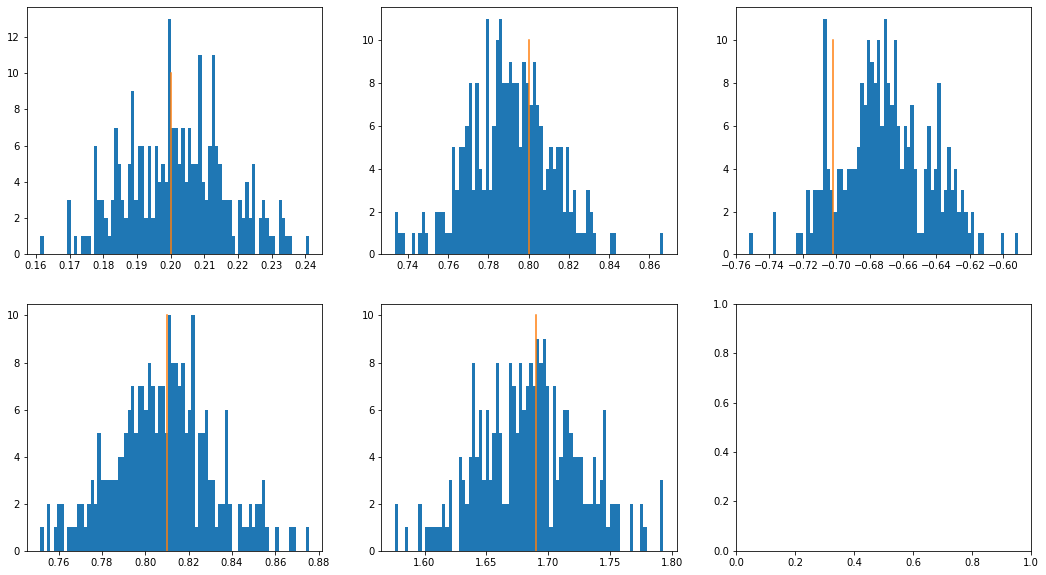

In [14]:
fig,ax = plt.subplots( 2, 3, figsize=(18,10))

hbins=80

ax[0][0].hist( fit_mean_x, bins=hbins)
ax[0][1].hist( fit_mean_y, bins=hbins)
ax[0][2].hist( fit_cov_xy, bins=hbins)
ax[1][0].hist( fit_sigma2_x, bins=hbins)
ax[1][1].hist( fit_sigma2_y, bins=hbins)

ax[0][0].plot( [true_mean_x, true_mean_x], [0, 10])
ax[0][1].plot( [true_mean_y, true_mean_y], [0, 10])
ax[0][2].plot( [true_cov_xy, true_cov_xy], [0, 10])
ax[1][0].plot( [true_sigma2_x, true_sigma2_x], [0, 10])
ax[1][1].plot( [true_sigma2_y, true_sigma2_y], [0, 10])

plt.show

[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:InputArguments -- RooAbsData::plotOn(data_weighted) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(x)


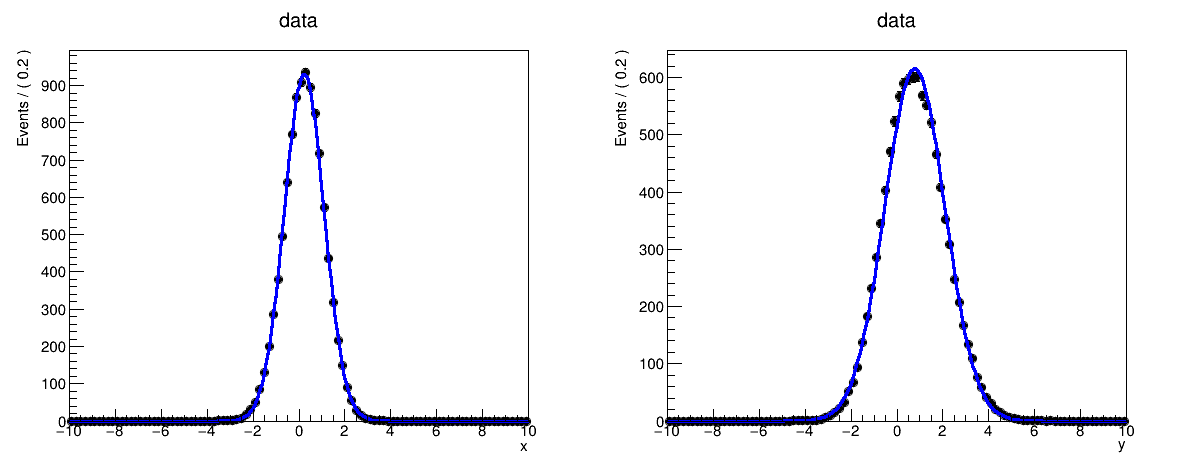

In [15]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(xframe)
rmvn.plotOn(xframe)
xframe.Draw()
can.Draw()

can.cd(2)
yframe = y.frame(ROOT.RooFit.Title("data"))
data_weighted.plotOn(yframe)
rmvn.plotOn(yframe)
yframe.Draw()
can.Draw()


<function matplotlib.pyplot.show(close=None, block=None)>

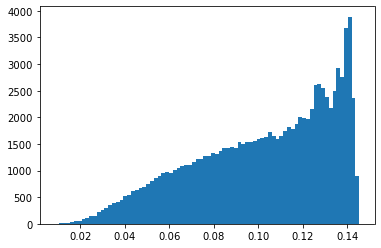

In [16]:
plt.hist(bootstrap_weights[0,:], bins=80)
plt.show

In [17]:
bootstrap_weights[0,:]

array([0.09147223, 0.09674677, 0.05711236, ..., 0.10691164, 0.09487162,
       0.0368714 ])

In [18]:
len(bootstrap_weights[0,:])

100000

<function matplotlib.pyplot.show(close=None, block=None)>

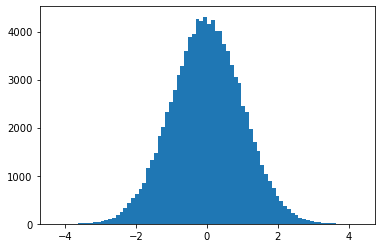

In [19]:
plt.hist( train_pts[:,0], bins=80 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

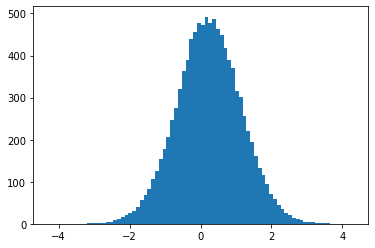

In [20]:
plt.hist( train_pts[:,0], bins=80, weights=bootstrap_weights[0,:] )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

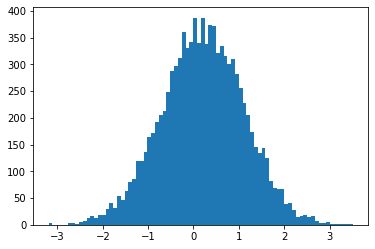

In [21]:
plt.hist( true_pts[:,0], bins=80 )
plt.show

In [22]:
tens = np.ones( len(true_pts))
tens = 10. * tens

In [23]:
tens

array([10., 10., 10., ..., 10., 10., 10.])

In [24]:
len(tens)

10000

In [25]:
len(true_pts)

10000

<function matplotlib.pyplot.show(close=None, block=None)>

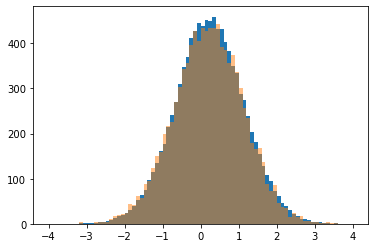

In [26]:
plt.hist( train_pts[:,0], bins=80, range=[-4,4], weights=bootstrap_weights[0,:] )
plt.hist( true_pts[:,0], bins=80, range=[-4,4],  alpha=0.5 )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

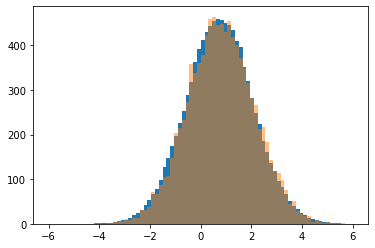

In [27]:
plt.hist( train_pts[:,1], bins=80, range=[-6.,6.], weights=bootstrap_weights[0,:] )
plt.hist( true_pts[:,1], bins=80, range=[-6.,6.],  alpha=0.5 )
plt.show

In [28]:
f0ave = np.mean( true_pts[:,0] )
f02ave = np.mean( true_pts[:,0]*true_pts[:,0] )
f0rms = np.sqrt( f02ave - f0ave*f0ave )
print(" f0rms = %.3f" % f0rms )

 f0rms = 0.909


In [29]:
np.mean( true_pts[:,0]*true_pts[:,0] )

0.869373815724289

In [30]:
f1ave = np.mean( true_pts[:,1] )
f12ave = np.mean( true_pts[:,1]*true_pts[:,1] )
f1rms = np.sqrt( f12ave - f1ave*f1ave )
print(" f0rms = %.3f" % f1rms )

 f0rms = 1.309


In [31]:
f0rms*f0rms

0.8264049095757728

In [32]:
f1rms*f1rms

1.7129413708610242